In [4]:
#画像を4分割してそれぞれの画像で円を復元し，IOUを計算する
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# マスク画像を読み込む
# filename = "IMG_1616.jpg"
date = "1216_jikunashi"

folders = [f"/home/data/{date}/maskBB/A",
           f"/home/data/{date}/maskBB/B",
           f"/home/data/{date}/maskBB/C",
           ]
iou_file = "/home/data/1216_jikunashi/1to4to1_iou.txt"
for folder in folders:
    with open(iou_file, 'w') as f:
        f.write('')
    for filename in os.listdir(folder):
        if filename.endswith(".JPEG"):
            mask_image = cv2.imread(f'{folder}/{filename}', cv2.IMREAD_GRAYSCALE)
            _, mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)
            # 輪郭を検出する
            contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # 最大の輪郭を選択する
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)

                # 真円をフィッティングする
                (x, y), radius = cv2.minEnclosingCircle(largest_contour)
                center = (int(x), int(y))
                radius = int(radius)
                shape_mask = np.zeros_like(mask_image)
                cv2.circle(shape_mask, center, radius, 255, -1)

                # 結果を表示する
                output_image = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2BGR)
                cv2.circle(output_image, center, radius, (0, 255, 0), 2)
                cv2.circle(output_image, center, 5, (0, 0, 255), -1)

            # 画像の高さと幅を取得
            height, width = mask_image.shape

            # フィッティングした円の中心座標を使用
            center_x, center_y = center

            # 画像を中心座標から4つの領域に分割
            regions = {
                '左上': mask_image[0:center_y, 0:center_x],
                '右上': mask_image[0:center_y, center_x:width],
                '左下': mask_image[center_y:height, 0:center_x],
                '右下': mask_image[center_y:height, center_x:width]
            }

            # 各領域を別画像として保存
            for region_name, region in regions.items():
                # cv2.imwrite(f'/home/src/circle1to4/{region_name}.png', region)

            # マスク画像を読み込む
                mask_image = region
                _, mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

                # 画像の高さと幅を取得
                height, width = mask_image.shape

                # 右下画像を反転して他の部分に配置
                if region_name == '右下':
                    left_bottom_image = cv2.flip(mask_image, 1)  # 左右反転
                    left_top_image = cv2.flip(left_bottom_image, 0)  # 上下反転
                    right_top_image = cv2.flip(mask_image, 0)  # 
                    # 元の円を復元するための空の画像を作成
                    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
                    # 各部分を配置
                    restored_image[height:, width:] = mask_image  # 右下
                    restored_image[height:, :width] = left_bottom_image  # 左下
                    restored_image[:height, :width] = left_top_image  # 左上
                    restored_image[:height, width:] = right_top_image  # 右上
                
                elif region_name == '右上':
                    left_top_image = cv2.flip(mask_image, 1)  # 左右反転
                    left_bottom_image = cv2.flip(left_top_image, 0)  # 上下反転
                    right_bottom_image = cv2.flip(mask_image, 0)  # 上下反転
                    # 元の円を復元するための空の画像を作成
                    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
                    # 各部分を配置
                    restored_image[height:, width:] = right_bottom_image  # 右下
                    restored_image[height:, :width] = left_bottom_image  # 左下
                    restored_image[:height, :width] = left_top_image  # 左上
                    restored_image[:height, width:] = mask_image  # 右上
                
                elif region_name == '左上':
                    # 右下画像を反転して他の部分に配置
                    right_top_image = cv2.flip(mask_image, 1)  # 左右反転
                    right_bottom_image = cv2.flip(right_top_image, 0)  # 上下反転
                    left_bottom_image = cv2.flip(mask_image, 0)  # 上下反転
                    # 元の円を復元するための空の画像を作成
                    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
                    # 各部分を配置
                    restored_image[height:, width:] = right_bottom_image  # 右下
                    restored_image[height:, :width] = left_bottom_image  # 左下
                    restored_image[:height, :width] = mask_image  # 左上
                    restored_image[:height, width:] = right_top_image  # 右上

                elif region_name == '左下':
                    # 右下画像を反転して他の部分に配置
                    right_bottom_image = cv2.flip(mask_image, 1)  # 左右反転
                    right_top_image = cv2.flip(right_bottom_image, 0)  # 上下反転
                    left_top_image = cv2.flip(mask_image, 0)  # 上下反転
                    # 元の円を復元するための空の画像を作成
                    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
                    # 各部分を配置
                    restored_image[height:, width:] = right_bottom_image  # 右下
                    restored_image[height:, :width] = mask_image  # 左下
                    restored_image[:height, :width] = left_top_image  # 左上
                    restored_image[:height, width:] = right_top_image  # 右上


                # 輪郭を検出する
                contours, _ = cv2.findContours(restored_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                max_contour = max(contours, key=cv2.contourArea)

                # 最大の輪郭を描写する
                output_image = cv2.cvtColor(restored_image, cv2.COLOR_GRAY2BGR)

                # 真円をフィッティングする
                (x, y), radius = cv2.minEnclosingCircle(max_contour)
                center = (int(x), int(y))
                radius = int(radius)
                shape_mask = np.zeros_like(restored_image)
                cv2.circle(shape_mask, center, radius, 255, -1)
                cv2.circle(output_image, center, radius, (0, 255, 0), 2)
                cv2.circle(output_image, center, 1, (0, 0, 255), -1)
                # 一致率を計算する
                intersection = cv2.bitwise_and(restored_image, shape_mask)
                union = cv2.bitwise_or(restored_image, shape_mask)
                intersection_area = np.sum(intersection == 255)
                union_area = np.sum(union == 255)
                iou = intersection_area / union_area
                
                # 一致率をファイルに保存する
                with open(iou_file, 'a') as f:
                    f.write(f'{filename}, {region_name} , {iou}, {radius}\n')

                # output_imageを中心から4分割して右下部分を保存する
                center_y, center_x = output_image.shape[0] // 2, output_image.shape[1] // 2
                if region_name == '右下':
                    right_bottom_part = output_image[center_y:, center_x:]
                elif region_name == '右上':
                    right_top_part = output_image[:center_y, center_x:]
                elif region_name == '左上':
                    left_top_part = output_image[:center_y, :center_x]
                elif region_name == '左下':
                    left_bottom_part = output_image[center_y:, :center_x]

            # 各部分の高さと幅を取得
            height_lb, width_lb = left_bottom_part.shape[:2]
            height_lt, width_lt = left_top_part.shape[:2]
            height_rb, width_rb = right_bottom_part.shape[:2]
            height_rt, width_rt = right_top_part.shape[:2]

            # 空の画像のサイズを計算
            total_height = max(height_lb + height_lt, height_rb + height_rt)
            total_width = max(width_lb + width_rb, width_lt + width_rt)

            # 元の円を復元するための空の画像を作成
            restored_image = np.zeros((total_height, total_width, 3), dtype=np.uint8)

            # 各部分を配置
            restored_image[total_height - height_lb:, :width_lb] = left_bottom_part  # 左下
            restored_image[:height_lt, :width_lt] = left_top_part  # 左上
            restored_image[total_height - height_rb:, total_width - width_rb:] = right_bottom_part  # 右下
            restored_image[:height_rt, total_width - width_rt:] = right_top_part  # 右上
            # 輪郭を検出するためにグレースケールに変換
            gray_image = cv2.cvtColor(restored_image, cv2.COLOR_BGR2GRAY)
            contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            max_contour = max(contours, key=cv2.contourArea)

        # 復元した画像を保存する
        # cv2.imwrite(f'/home/src/circle1to4/{filename}', restored_image)

In [7]:
import cv2
import os
import numpy as np

# 円を復元する関数
def restore_circle(region_name, region):
    """
    領域名とその画像から円を復元する
    """
    # 入力画像の左右反転と上下反転
    flip_h = cv2.flip(region, 1)
    flip_v = cv2.flip(region, 0)
    flip_hv = cv2.flip(flip_h, 0)

    # 領域ごとに配置
    height, width = region.shape
    restored = np.zeros((height * 2, width * 2), dtype=np.uint8)

    if region_name == '右下':
        restored[height:, width:] = region
        restored[height:, :width] = flip_h
        restored[:height, :width] = flip_hv
        restored[:height, width:] = flip_v
    elif region_name == '右上':
        restored[:height, width:] = region
        restored[:height, :width] = flip_h
        restored[height:, :width] = flip_hv
        restored[height:, width:] = flip_v
    elif region_name == '左上':
        restored[:height, :width] = region
        restored[:height, width:] = flip_h
        restored[height:, width:] = flip_hv
        restored[height:, :width] = flip_v
    elif region_name == '左下':
        restored[height:, :width] = region
        restored[:height, :width] = flip_h
        restored[:height, width:] = flip_hv
        restored[height:, width:] = flip_v

    return restored

# 入力フォルダとファイル
date = "0108_jikunashi_energee"
folders = [f"/home/data/{date}/maskBB/A",
           f"/home/data/{date}/maskBB/B",
           f"/home/data/{date}/maskBB/C"]
iou_file = f"/home/data/{date}/1to4to1_iou.txt"

# ファイル内容を初期化
with open(iou_file, 'w') as f:
    f.write("Filename, Region, IOU, Radius\n")

# フォルダごとに処理
for folder in folders:
    for filename in os.listdir(folder):
        if not filename.endswith(".JPEG"):
            continue

        # マスク画像を読み込む
        file_path = os.path.join(folder, filename)
        mask_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if mask_image is None:
            print(f"Failed to load image: {file_path}")
            continue

        _, mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

        # 輪郭検出と円フィッティング
        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            print(f"No contours found in: {filename}")
            continue

        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        center = (int(x), int(y))
        radius = int(radius)

        # 画像分割
        height, width = mask_image.shape
        center_x, center_y = center
        regions = {
            '左上': mask_image[0:center_y, 0:center_x],
            '右上': mask_image[0:center_y, center_x:],
            '左下': mask_image[center_y:, 0:center_x],
            '右下': mask_image[center_y:, center_x:]
        }

        # 各領域を復元
        for region_name, region in regions.items():
            restored_image = restore_circle(region_name, region)
            # IOU計算
            if restored_image.shape != mask_image.shape:
                print(f"Size mismatch: restored_image={restored_image.shape}, mask_image={mask_image.shape}. Resizing...")
                restored_image = cv2.resize(restored_image, (mask_image.shape[1], mask_image.shape[0]))

            intersection = cv2.bitwise_and(restored_image, mask_image)
            union = cv2.bitwise_or(restored_image, mask_image)
            intersection_area = np.sum(intersection == 255)
            union_area = np.sum(union == 255)
            iou = intersection_area / union_area if union_area != 0 else 0

            intersection = cv2.bitwise_and(restored_image, mask_image)
            union = cv2.bitwise_or(restored_image, mask_image)
            intersection_area = np.sum(intersection == 255)
            union_area = np.sum(union == 255)
            iou = intersection_area / union_area if union_area != 0 else 0

            # 結果を保存
            with open(iou_file, 'a') as f:
                f.write(f"{filename}, {region_name}, {iou:.4f}, {radius}\n")


Size mismatch: restored_image=(462, 456), mask_image=(448, 466). Resizing...
Size mismatch: restored_image=(462, 476), mask_image=(448, 466). Resizing...
Size mismatch: restored_image=(434, 456), mask_image=(448, 466). Resizing...
Size mismatch: restored_image=(434, 476), mask_image=(448, 466). Resizing...
Size mismatch: restored_image=(462, 428), mask_image=(468, 458). Resizing...
Size mismatch: restored_image=(462, 488), mask_image=(468, 458). Resizing...
Size mismatch: restored_image=(474, 428), mask_image=(468, 458). Resizing...
Size mismatch: restored_image=(474, 488), mask_image=(468, 458). Resizing...
Size mismatch: restored_image=(528, 528), mask_image=(520, 542). Resizing...
Size mismatch: restored_image=(528, 556), mask_image=(520, 542). Resizing...
Size mismatch: restored_image=(512, 528), mask_image=(520, 542). Resizing...
Size mismatch: restored_image=(512, 556), mask_image=(520, 542). Resizing...
Size mismatch: restored_image=(548, 558), mask_image=(543, 533). Resizing...

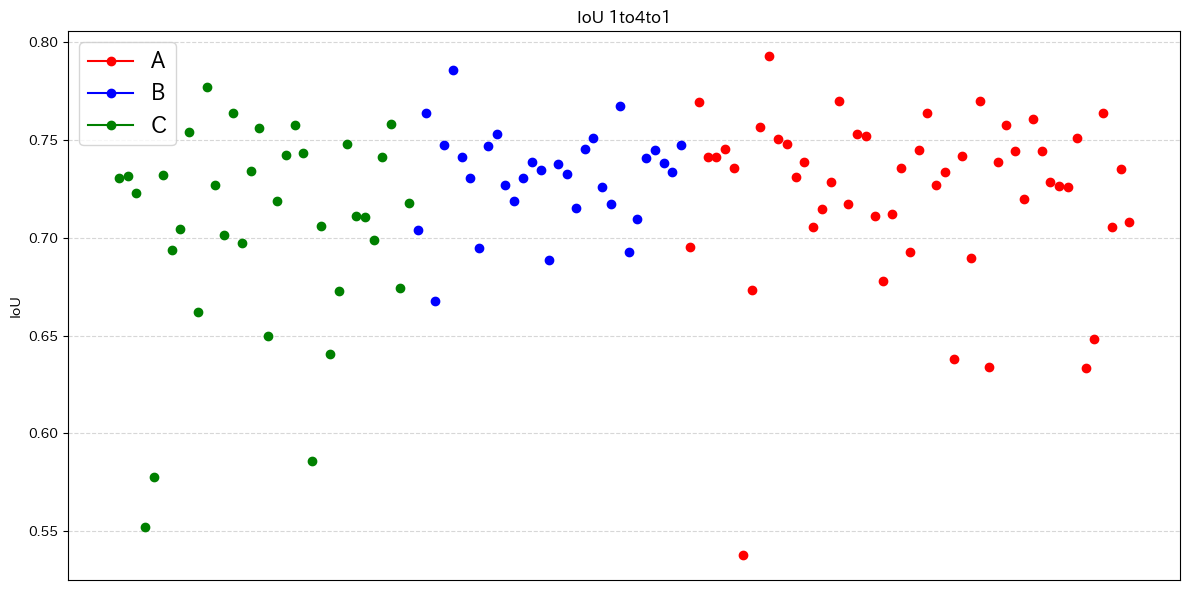

In [1]:
import os
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

# 処理する結果ファイルのパス
result_file = "/home/data/0108_jikunashi_energee/1to4to1_iou.txt"

# ファイル名とIoUを保存するリスト
file_names = []
max_values = []
min_values = []
avg_values = []
diff_values = []

# 各結果ファイルを読み込んでデータを抽出
with open(result_file, 'r') as f:
    lines = f.readlines()
    current_file_name = None
    values = []
    parts3_values = []

    for line in lines:
        if line.startswith("IMG_"):
            parts = line.split(',')
            file_name = parts[0].strip()
            value = float(parts[2].strip())
            parts3_value = float(parts[3].strip())

            if current_file_name is None:
                current_file_name = file_name

            if file_name == current_file_name:
                values.append(value)
                parts3_values.append(parts3_value)
            else:
                if len(values) == 4:
                    file_names.append(current_file_name)
                    max_values.append(max(values))
                    min_values.append(min(values))
                    avg_values.append(sum(values) / len(values))
                    diff_values.append(max(parts3_values) - min(parts3_values))

                current_file_name = file_name
                values = [value]
                parts3_values = [parts3_value]

    # 最後のファイルの処理
    if len(values) == 4:
        file_names.append(current_file_name)
        max_values.append(max(values))
        min_values.append(min(values))
        avg_values.append(sum(values) / len(values))
        diff_values.append(max(parts3_values) - min(parts3_values))

# 数字部分でソートするための関数
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    if match:
        return int(match.group())
    return float('inf')  # 数字が見つからない場合は無限大を返す

# ファイル名と対応する値をソート
sorted_data = sorted(zip(file_names, max_values, min_values, avg_values, diff_values), key=lambda x: extract_number(x[0]))
sorted_file_names, sorted_max_values, sorted_min_values, sorted_avg_values, sorted_diff_values = zip(*sorted_data)

# ハイライトする範囲を指定 (例: 3つの範囲)
highlight_ranges = [
    (1827, 1929, 'red'),    # 範囲1: 赤色
    (1744, 1826, 'blue'),  # 範囲2: 青色
    (1691, 1742, 'green')    # 範囲3: 緑色
]

# グラフを作成
fig, ax1 = plt.subplots(figsize=(12, 6))

# 凡例を事前に描画（ラベルをA等級, B等級, C等級に変更）
highlight_labels = ['A', 'B', 'C']
for (_, _, color), label in zip(highlight_ranges, highlight_labels):
    ax1.plot([], [], label=label, marker='o', color=color)

# IoU(min)の折れ線グラフを作成
for file_name, min_value in zip(sorted_file_names, sorted_min_values):
    # 数字部分を抽出
    match = re.search(r'\d+', file_name)
    if match:
        file_number = int(match.group())
    else:
        file_number = -1  # 異常値として扱う

    # 色を決定
    plot_color = 'black'  # デフォルトの色
    for range_start, range_end, color in highlight_ranges:
        if range_start <= file_number <= range_end:
            plot_color = color
            break

    # グラフにプロット
    ax1.plot(file_name, min_value, marker='o', color=plot_color)

# 軸ラベル、凡例、タイトルを設定
ax1.set_ylabel('IoU')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left',fontsize = 16)  # 凡例を左上に配置
plt.title('IoU 1to4to1')

# 背景に補助線を追加
plt.grid(linestyle='--', alpha=0.5)

# x軸のラベルを非表示
plt.xticks([], [])
# plt.xticks(rotation=90, fontsize=8)
fig.tight_layout()

# グラフを表示
plt.show()


In [1]:
#画像を4分割して保存する
import cv2
import numpy as np
import matplotlib.pyplot as plt

# マスク画像を読み込む
mask_image = cv2.imread('/home/data/0930/mask/IMG_1625.jpg', cv2.IMREAD_GRAYSCALE)
_, mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

# 輪郭を検出する
contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 最大の輪郭を選択する
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # 真円をフィッティングする
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(x), int(y))
    radius = int(radius)
    shape_mask = np.zeros_like(mask_image)
    cv2.circle(shape_mask, center, radius, 255, -1)

    # 一致率を計算する
    intersection = cv2.bitwise_and(mask_image, shape_mask)
    union = cv2.bitwise_or(mask_image, shape_mask)
    intersection_area = np.sum(intersection == 255)
    union_area = np.sum(union == 255)
    iou = intersection_area / union_area

    # 結果を表示する
    output_image = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2BGR)
    cv2.circle(output_image, center, radius, (0, 255, 0), 2)
    cv2.circle(output_image, center, 5, (0, 0, 255), -1)
    # plt.title(f'Center: {center}, Radius: {radius}, IoU: {iou:.2f}')
    # plt.imshow(output_image)
    # plt.show()

# 画像の高さと幅を取得
height, width = mask_image.shape

# フィッティングした円の中心座標を使用
center_x, center_y = center

# 画像を中心座標から4つの領域に分割
regions = {
    '左上': mask_image[0:center_y, 0:center_x],
    '右上': mask_image[0:center_y, center_x:width],
    '左下': mask_image[center_y:height, 0:center_x],
    '右下': mask_image[center_y:height, center_x:width]
}

# 各領域を別画像として保存
for region_name, region in regions.items():
    cv2.imwrite(f'/home/src/circle1to4/{region_name}.png', region)

# # 各領域を表示する
# for region_name, region in regions.items():
#     plt.figure()
#     plt.title(f'{region_name}')
#     plt.imshow(region, cmap='gray')
#     plt.axis('off')

plt.show()

0.8238636363636364


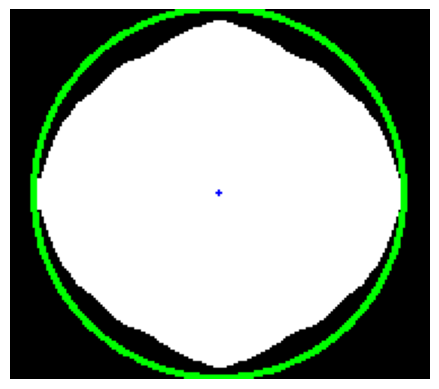

In [2]:
#4分割した画像を復元しIoUを計算する
import cv2
import numpy as np
import matplotlib.pyplot as plt
region_name = '左上'

# マスク画像を読み込む
mask_image = cv2.imread(f'/home/src/circle1to4/{region_name}.png', cv2.IMREAD_GRAYSCALE)
_, mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

# 画像の高さと幅を取得
height, width = mask_image.shape

if region_name == '右下':
    left_bottom_image = cv2.flip(mask_image, 1)  # 左右反転
    left_top_image = cv2.flip(left_bottom_image, 0)  # 上下反転
    right_top_image = cv2.flip(mask_image, 0)  # 
    # 元の円を復元するための空の画像を作成
    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
    # 各部分を配置
    restored_image[height:, width:] = mask_image  # 右下
    restored_image[height:, :width] = left_bottom_image  # 左下
    restored_image[:height, :width] = left_top_image  # 左上
    restored_image[:height, width:] = right_top_image  # 右上

elif region_name == '右上':
    left_top_image = cv2.flip(mask_image, 1)  # 左右反転
    left_bottom_image = cv2.flip(left_top_image, 0)  # 上下反転
    right_bottom_image = cv2.flip(mask_image, 0)  # 上下反転
    # 元の円を復元するための空の画像を作成
    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
    # 各部分を配置
    restored_image[height:, width:] = right_bottom_image  # 右下
    restored_image[height:, :width] = left_bottom_image  # 左下
    restored_image[:height, :width] = left_top_image  # 左上
    restored_image[:height, width:] = mask_image  # 右上

elif region_name == '左上':
    # 右下画像を反転して他の部分に配置
    right_top_image = cv2.flip(mask_image, 1)  # 左右反転
    right_bottom_image = cv2.flip(right_top_image, 0)  # 上下反転
    left_bottom_image = cv2.flip(mask_image, 0)  # 上下反転
    # 元の円を復元するための空の画像を作成
    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
    # 各部分を配置
    restored_image[height:, width:] = right_bottom_image  # 右下
    restored_image[height:, :width] = left_bottom_image  # 左下
    restored_image[:height, :width] = mask_image  # 左上
    restored_image[:height, width:] = right_top_image  # 右上

elif region_name == '左下':
    # 右下画像を反転して他の部分に配置
    right_bottom_image = cv2.flip(mask_image, 1)  # 左右反転
    right_top_image = cv2.flip(right_bottom_image, 0)  # 上下反転
    left_top_image = cv2.flip(mask_image, 0)  # 上下反転
    # 元の円を復元するための空の画像を作成
    restored_image = np.zeros((height * 2, width * 2), dtype=np.uint8)
    # 各部分を配置
    restored_image[height:, width:] = right_bottom_image  # 右下
    restored_image[height:, :width] = mask_image  # 左下
    restored_image[:height, :width] = left_top_image  # 左上
    restored_image[:height, width:] = right_top_image  # 右上


# 輪郭を検出する
contours, _ = cv2.findContours(restored_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

# 最大の輪郭を描写する
output_image = cv2.cvtColor(restored_image, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(output_image, [max_contour], -1, (0, 255, 0), 2)

# 真円をフィッティングする
(x, y), radius = cv2.minEnclosingCircle(max_contour)
center = (int(x), int(y))
radius = int(radius)
shape_mask = np.zeros_like(restored_image)
cv2.circle(shape_mask, center, radius, 255, -1)
cv2.circle(output_image, center, radius, (0, 255, 0), 2)
cv2.circle(output_image, center, 1, (0, 0, 255), -1)

intersection = cv2.bitwise_and(restored_image, shape_mask)
union = cv2.bitwise_or(restored_image, shape_mask)
intersection_area = np.sum(intersection == 255)
union_area = np.sum(union == 255)
iou = intersection_area / union_area
print(iou)

# 結果を表示する
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

# output_imageを中心から4分割して右下部分を保存する
center_y, center_x = output_image.shape[0] // 2, output_image.shape[1] // 2
right_bottom_part = output_image[center_y:, center_x:]

# plt.imshow(right_bottom_part, cmap='gray')